In [1]:
import time, sys

# Import the Qiskit 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QiskitError
from qiskit import execute, IBMQ, BasicAer, transpiler, Aer
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.mapper import Layout

## Define your backend

In [2]:
# execute on the qasm simulator
import qiskit
backend = qiskit.Aer.get_backend('qasm_simulator')
print(backend)

qasm_simulator


## Define the UCCSD ansatz circuit

In [3]:
def get_ucc_ansatz(theta):
    circuit = QuantumCircuit(2, 2)
    circuit.x(0)
    circuit.ry(theta, 1)
    circuit.cx(1, 0)
    return circuit

## Define the naive measurement circuits
more automations can be done in here

In [4]:
# define the number of shots
shots = 5000

def measure_zi(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots)
    #job_monitor(job)
    counts = job.result().get_counts(circuit)
    return (counts.get('00', 0) + counts.get('10', 0) - counts.get('11', 0) - counts.get('01', 0))/shots


def measure_iz(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots)
    #job_monitor(job)
    counts = job.result().get_counts(circuit)
    return (counts.get('00', 0) + counts.get('01', 0) - counts.get('10', 0) - counts.get('11', 0))/shots


def measure_xx(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.h(0)
    circuit.h(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots)
    #job_monitor(job)
    counts = job.result().get_counts(circuit)
    return (counts.get('00', 0) + counts.get('11', 0) - counts.get('01', 0) - counts.get('10', 0))/shots


def measure_yy(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.h(0)
    circuit.sdg(0)
    circuit.h(1)
    circuit.sdg(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots)
    #job_monitor(job)
    counts = job.result().get_counts(circuit)
    return (counts.get('00', 0) + counts.get('11', 0) - counts.get('01', 0) - counts.get('10', 0))/shots

def measure_hamiltonian(theta):
    return 5.9 + .22 * measure_zi(theta) - 6.1 * measure_iz(theta) - 2.14 * measure_xx(theta) - 2.14 * measure_yy(theta)

### run the experiment with different theta value

In [5]:
import numpy as np
values = []
thetas = []
for theta in np.arange(-np.pi, np.pi, np.pi/6):
    values.append(measure_hamiltonian(theta))
    thetas.append(theta)
print(values)
print(thetas)

[12.25424, 13.421864000000001, 12.653080000000001, 10.20152, 6.443704000000001, 2.6195520000000014, -0.35922399999999904, -1.736223999999999, -1.073368, 1.660952, 5.332592000000002, 9.200616000000002]
[-3.141592653589793, -2.6179938779914944, -2.0943951023931957, -1.570796326794897, -1.0471975511965983, -0.5235987755982996, -8.881784197001252e-16, 0.5235987755982978, 1.0471975511965965, 1.5707963267948948, 2.094395102393194, 2.617993877991493]


### plot the results

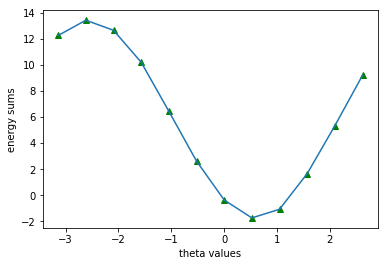

In [7]:
import matplotlib.pyplot as plt
plt.plot(thetas, values, 'g^')
plt.plot(thetas, values)
plt.xlabel('theta values')
plt.ylabel('energy sums')
plt.show()

## Define the simultaneous measurement circuits
more automations can be done in here

In [8]:
# define the number of shots
shots = 5000

def measure_zi_and_iz(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots)
    #job_monitor(job)
    counts = job.result().get_counts(circuit)
    zi = (counts.get('00', 0) + counts.get('10', 0) - counts.get('11', 0) - counts.get('01', 0))/shots
    iz = (counts.get('00', 0) + counts.get('01', 0) - counts.get('10', 0) - counts.get('11', 0))/shots
    return zi, iz

def measure_xx_and_yy(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.h(1)
    circuit.cx(1, 0)
    circuit.cz(0, 1)
    circuit.h(0)
    circuit.h(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots)
    #job_monitor(job)
    counts = job.result().get_counts(circuit)
    xx = (counts.get('00', 0) + counts.get('10', 0) - counts.get('11', 0) - counts.get('01', 0))/shots
    yy = (counts.get('00', 0) + counts.get('01', 0) - counts.get('10', 0) - counts.get('11', 0))/shots
    return xx, yy

def measure_simultaneously_hamiltonian(theta):
    xx, yy = measure_xx_and_yy(theta)
    zi, iz = measure_zi_and_iz(theta)
    return 5.9 + .22 * zi - 6.1 * iz - 2.14 * xx - 2.14 * yy

### run the experiment with different theta value

In [9]:
import numpy as np
values2 = []
for theta in np.arange(-np.pi, np.pi, np.pi/6):
    values2.append(measure_hamiltonian(theta))
print(values2)

[12.194319999999998, 13.55516, 12.660888000000002, 10.039712000000002, 6.459328, 2.4680560000000007, -0.44824799999999904, -1.6949919999999998, -1.0587199999999994, 1.5412800000000004, 5.355040000000001, 9.303232]


### plot the results

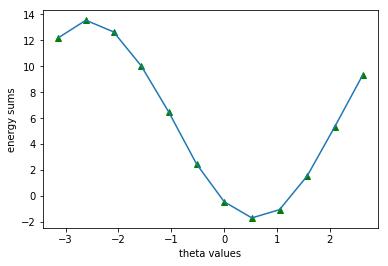

In [10]:
import matplotlib.pyplot as plt
plt.plot(thetas, values2, 'g^')
plt.plot(thetas, values2)
plt.xlabel('theta values')
plt.ylabel('energy sums')
plt.show()

## Calculate the difference between the naive and simultaneous methods

In [11]:
value_diff = []
for theta in range(len(thetas)):
    value_diff.append(values[theta] - values2[theta])

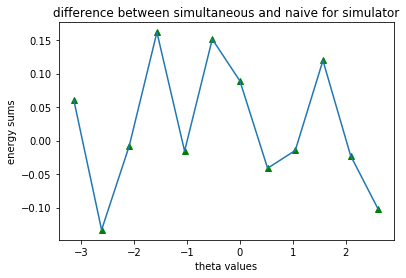

In [12]:
import matplotlib.pyplot as plt
plt.plot(thetas, value_diff, 'g^')
plt.plot(thetas, value_diff)
plt.xlabel('theta values')
plt.ylabel('energy sums')
plt.title('difference between simultaneous and naive for simulator')
plt.show()

## Superimpose the two

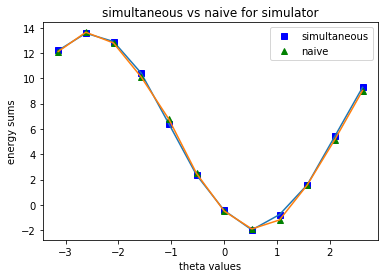

In [21]:
plt.plot(thetas, values2, 'bs', label = 'simultaneous')
plt.plot(thetas, values2)
plt.plot(thetas, values, 'g^', label = 'naive')
plt.plot(thetas, values)
plt.xlabel('theta values')
plt.ylabel('energy sums')
plt.title('simultaneous vs naive for simulator')
plt.legend(loc='best')
plt.show()